# nuScenes lidarseg and panoptic tutorial

Welcome to the nuScenes lidarseg and panoptic tutorial. The lidarseg and panoptic share quite many functions in the tutorial, so we put them into single tutorial. But you can opt to set up either the lidarseg or the panoptic dataset, and only run the portion for specific task.

This demo assumes that nuScenes is installed at `/data/sets/nuscenes`. The mini version (i.e. v1.0-mini) of the full dataset will be used for this demo.

## Setup
To install the nuScenes-lidarseg and/or Panoptic nuScenes expansion, download the dataset from https://www.nuscenes.org/download. Unpack the compressed file(s) into `/data/sets/nuscenes` and your folder structure should end up looking like this:
```
└── nuscenes  
    ├── Usual nuscenes folders (i.e. samples, sweep)
    │
    ├── lidarseg
    │   └── v1.0-{mini, test, trainval} <- Contains the .bin files; a .bin file
    │                                      contains the labels of the points in a
    │                                      point cloud (note that v1.0-test does not
    │                                      have any .bin files associated with it)
    │
    ├── panoptic
    │   └── v1.0-{mini, test, trainval} <- Contains the *_panoptic.npz files; a .npz file
    │                                      contains the panoptic labels of the points in a
    │                                      point cloud (note that v1.0-test does not
    │                                      have any .npz files associated with it)
    └── v1.0-{mini, test, trainval}
        ├── Usual files (e.g. attribute.json, calibrated_sensor.json etc.)
        ├── lidarseg.json  <- contains the mapping of each .bin file to the token
        ├── panoptic.json  <- contains the mapping of each .npz file to the token       
        └── category.json  <- contains the categories of the labels (note that the
                              category.json from nuScenes v1.0 is overwritten)
```

## Google Colab (optional)

<br>
<a href="https://colab.research.google.com/github/nutonomy/nuscenes-devkit/blob/master/python-sdk/tutorials/nuscenes_lidarseg_panoptic_tutorial.ipynb">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/ align="left">
</a>
<br>

If you are running this notebook in Google Colab, you can uncomment the cell below and run it; everything will be set up nicely for you. Otherwise, go to [**Setup**](#Setup) to manually set up everything.

Download and setup nuScenes-devkit for nuScenes-lidarseg dataset.

In [4]:
cd /home/Graph_LiDAR/data

/home/Graph_LiDAR/data


In [5]:
ls

nuscenes_lidarseg_panoptic_tutorial.ipynb


In [6]:
!mkdir ./nuscenes

!wget https://www.nuscenes.org/data/v1.0-mini.tgz  # Download the nuScenes mini split.
!wget https://www.nuscenes.org/data/nuScenes-lidarseg-mini-v1.0.tar.bz2  # Download the nuScenes-lidarseg mini split.

--2024-08-09 18:58:24--  https://www.nuscenes.org/data/v1.0-mini.tgz
Resolving www.nuscenes.org (www.nuscenes.org)... 108.157.150.107, 108.157.150.24, 108.157.150.64, ...
Connecting to www.nuscenes.org (www.nuscenes.org)|108.157.150.107|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4167696325 (3.9G) [application/x-tar]
Saving to: ‘v1.0-mini.tgz’

v1.0-mini.tgz       100%[===================>]   3.88G  27.1MB/s    in 2m 16s  

2024-08-09 19:00:41 (29.2 MB/s) - ‘v1.0-mini.tgz’ saved [4167696325/4167696325]

--2024-08-09 19:00:41--  https://www.nuscenes.org/data/nuScenes-lidarseg-mini-v1.0.tar.bz2
Resolving www.nuscenes.org (www.nuscenes.org)... 99.84.203.77, 99.84.203.41, 99.84.203.117, ...
Connecting to www.nuscenes.org (www.nuscenes.org)|99.84.203.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1819477 (1.7M) [application/x-tar]
Saving to: ‘nuScenes-lidarseg-mini-v1.0.tar.bz2’

nuScenes-lidarseg-m 100%[===================>]   1.7

In [7]:
!tar -xf v1.0-mini.tgz -C ./nuscenes  # Uncompress the nuScenes mini split.
!tar -xf nuScenes-lidarseg-mini-v1.0.tar.bz2 -C ./nuscenes   # Uncompress the nuScenes-lidarseg mini split.

!pip install nuscenes-devkit &> /dev/null  # Install nuScenes.

## Initialization
Let's start by importing the necessary libraries:

In [9]:
from nuscenes import NuScenes

nusc = NuScenes(version='v1.0-mini', dataroot='./nuscenes', verbose=True)

Loading NuScenes tables for version v1.0-mini...
Loading nuScenes-lidarseg...
32 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
404 lidarseg,
Done loading in 0.591 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.


As you can see, you do not need any extra libraries to use nuScenes-lidarseg and Panoptic nuScenes. The original nuScenes devkit which you are familiar with has been extended so that you can use it seamlessly with nuScenes-lidarseg and Panoptic nuScenes.

## Point statistics of lidarseg/panoptic dataset for the v1.0-mini split
Let's get a quick feel of the lidarseg dataset by looking at what classes are in it and the number of points belonging to each class. The classes will be sorted in ascending order based on the number of points (since `sort_by='count'` below); you can also sort the classes by class name or class index by setting `sort_by='name'` or `sort_by='index'` respectively.

In [10]:
# nuscenes-lidarseg
nusc.list_lidarseg_categories(sort_by='count')

Calculating semantic point stats for nuScenes-lidarseg...
  1  animal                                   nbr_points=           0
  7  human.pedestrian.stroller                nbr_points=           0
  8  human.pedestrian.wheelchair              nbr_points=           0
 19  vehicle.emergency.ambulance              nbr_points=           0
 20  vehicle.emergency.police                 nbr_points=           0
 10  movable_object.debris                    nbr_points=          48
  6  human.pedestrian.police_officer          nbr_points=          64
  3  human.pedestrian.child                   nbr_points=         230
  4  human.pedestrian.construction_worker     nbr_points=       1,412
 14  vehicle.bicycle                          nbr_points=       1,463
 11  movable_object.pushable_pullable         nbr_points=       2,293
  5  human.pedestrian.personal_mobility       nbr_points=       4,096
 13  static_object.bicycle_rack               nbr_points=       4,476
 12  movable_object.trafficcone 

With `list_lidarseg_categories`, you can get the index which each class name belongs to by looking at the leftmost column. You can also get a mapping of the indices to the class names from the `lidarseg_idx2name_mapping` attribute of the NuScenes class.

In [11]:
nusc.lidarseg_idx2name_mapping

{0: 'noise',
 1: 'animal',
 2: 'human.pedestrian.adult',
 3: 'human.pedestrian.child',
 4: 'human.pedestrian.construction_worker',
 5: 'human.pedestrian.personal_mobility',
 6: 'human.pedestrian.police_officer',
 7: 'human.pedestrian.stroller',
 8: 'human.pedestrian.wheelchair',
 9: 'movable_object.barrier',
 10: 'movable_object.debris',
 11: 'movable_object.pushable_pullable',
 12: 'movable_object.trafficcone',
 13: 'static_object.bicycle_rack',
 14: 'vehicle.bicycle',
 15: 'vehicle.bus.bendy',
 16: 'vehicle.bus.rigid',
 17: 'vehicle.car',
 18: 'vehicle.construction',
 19: 'vehicle.emergency.ambulance',
 20: 'vehicle.emergency.police',
 21: 'vehicle.motorcycle',
 22: 'vehicle.trailer',
 23: 'vehicle.truck',
 24: 'flat.driveable_surface',
 25: 'flat.other',
 26: 'flat.sidewalk',
 27: 'flat.terrain',
 28: 'static.manmade',
 29: 'static.other',
 30: 'static.vegetation',
 31: 'vehicle.ego'}

Conversely, you can get the mapping of the class names to the indices from the `lidarseg_name2idx_mapping` attribute of the NuScenes class.

In [12]:
nusc.lidarseg_name2idx_mapping

{'noise': 0,
 'animal': 1,
 'human.pedestrian.adult': 2,
 'human.pedestrian.child': 3,
 'human.pedestrian.construction_worker': 4,
 'human.pedestrian.personal_mobility': 5,
 'human.pedestrian.police_officer': 6,
 'human.pedestrian.stroller': 7,
 'human.pedestrian.wheelchair': 8,
 'movable_object.barrier': 9,
 'movable_object.debris': 10,
 'movable_object.pushable_pullable': 11,
 'movable_object.trafficcone': 12,
 'static_object.bicycle_rack': 13,
 'vehicle.bicycle': 14,
 'vehicle.bus.bendy': 15,
 'vehicle.bus.rigid': 16,
 'vehicle.car': 17,
 'vehicle.construction': 18,
 'vehicle.emergency.ambulance': 19,
 'vehicle.emergency.police': 20,
 'vehicle.motorcycle': 21,
 'vehicle.trailer': 22,
 'vehicle.truck': 23,
 'flat.driveable_surface': 24,
 'flat.other': 25,
 'flat.sidewalk': 26,
 'flat.terrain': 27,
 'static.manmade': 28,
 'static.other': 29,
 'static.vegetation': 30,
 'vehicle.ego': 31}

You might have noticed the point numbers for certain categories vary slightly between lidarseg and panoptic dataset. The reason is the overlapping points between instances are set to noise (category 0) in Panoptic nuScenes. You can see the increased number of points for `noise` category in Panoptic nuScenes, and the total point number remains the same.

## Pick a sample token
Let's pick a sample to use for this tutorial.

In [14]:
my_sample = nusc.sample[87]

## Get statistics of a lidarseg/panoptic sample token
Now let's take a look at what classes are present in the pointcloud of this particular sample.

In [15]:
# nuscenes-lidarseg
nusc.get_sample_lidarseg_stats(my_sample['token'], sort_by='count')

===== Statistics for 6dabc0fb1df045558f802246dd186b3f =====
 14  vehicle.bicycle                          n=           9
 11  movable_object.pushable_pullable         n=          11
  0  noise                                    n=          62
  2  human.pedestrian.adult                   n=          71
 16  vehicle.bus.rigid                        n=         105
  9  movable_object.barrier                   n=         280
 22  vehicle.trailer                          n=         302
 30  static.vegetation                        n=         330
 23  vehicle.truck                            n=       1,229
 26  flat.sidewalk                            n=       1,310
 25  flat.other                               n=       1,495
 17  vehicle.car                              n=       3,291
 28  static.manmade                           n=       4,650
 24  flat.driveable_surface                   n=       9,884
 31  vehicle.ego                              n=      11,723


By doing `sort_by='count'`, the classes and their respective frequency counts are printed in ascending order; you can also do `sort_by='name'` and `sort_by='index'` here as well.

## Render the lidarseg labels in the bird's eye view of a pointcloud
In the original nuScenes devkit, you would pass a sample data token into ```render_sample_data``` to render a bird's eye view of the pointcloud. However, the points would be colored according to the distance from the ego vehicle. Now with the extended nuScenes devkit, all you need to do is set ```show_lidarseg=True``` to visualize the class labels of the pointcloud.

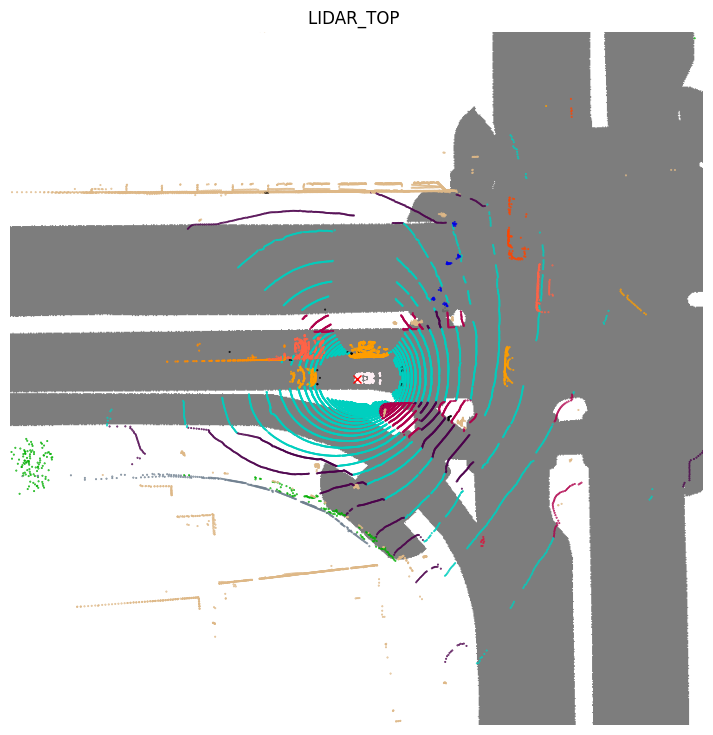

In [16]:
sample_data_token = my_sample['data']['LIDAR_TOP']
nusc.render_sample_data(sample_data_token,
                        with_anns=False,
                        show_lidarseg=True)

But what if you wanted to focus on only certain classes? Given the statistics of the pointcloud printed out previously, let's say you are only interested in trucks and trailers. You could see the class indices belonging to those classes from the statistics and then pass an array of those indices into ```filter_lidarseg_labels``` like so:

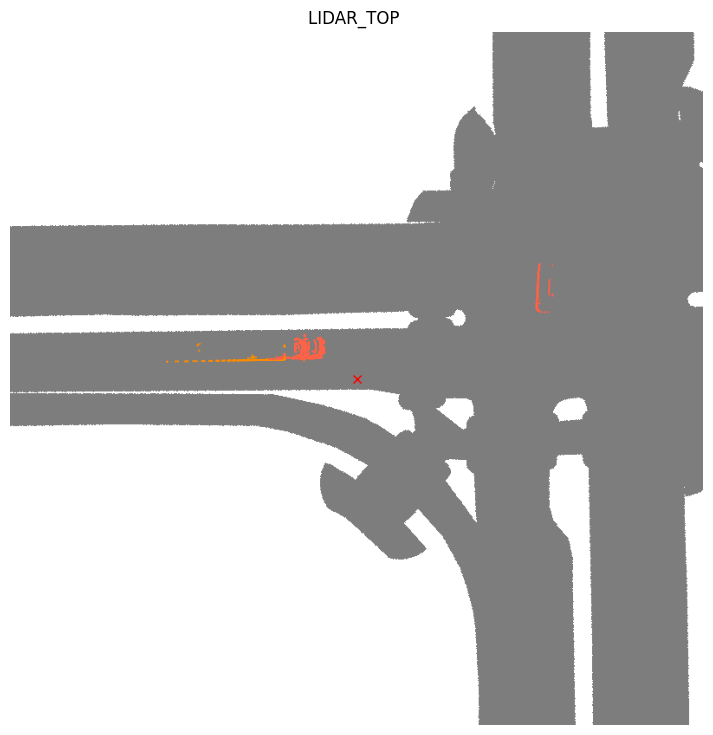

In [17]:
nusc.render_sample_data(sample_data_token,
                        with_anns=False,
                        show_lidarseg=True,
                        filter_lidarseg_labels=[22, 23])

Now only points in the pointcloud belonging to trucks and trailers are filtered out for your viewing pleasure.

In addition, you can display a legend which indicates the color for each class by using `show_lidarseg_legend`.

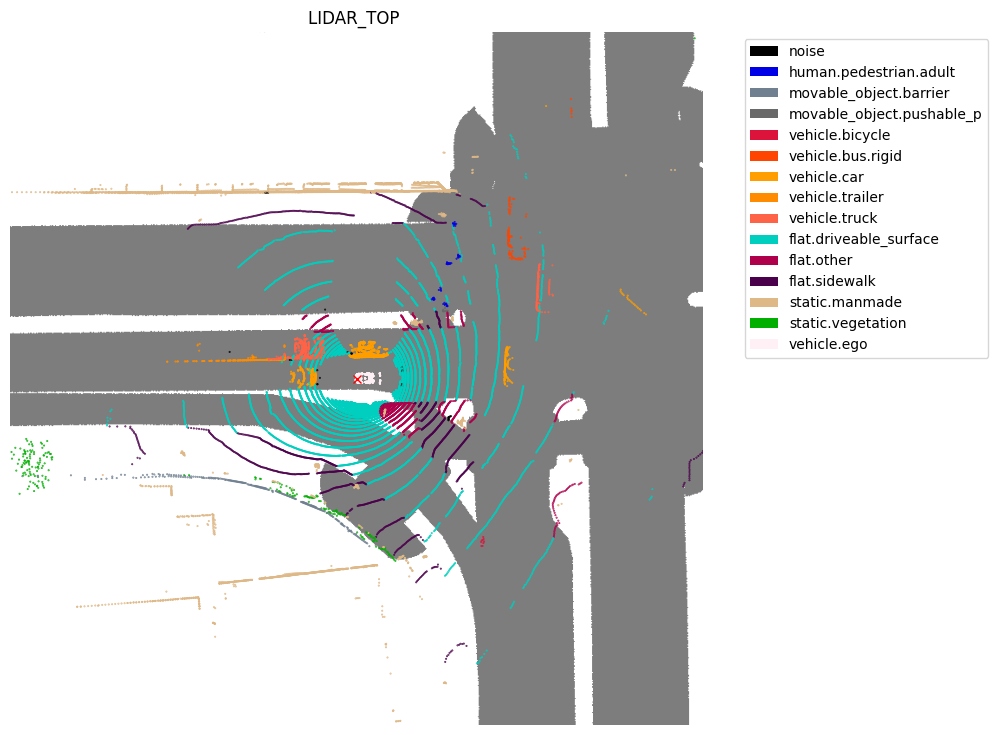

In [18]:
nusc.render_sample_data(sample_data_token,
                        with_anns=False,
                        show_lidarseg=True,
                        show_lidarseg_legend=True)

## Render lidarseg/panoptic labels in image
If you wanted to superimpose the pointcloud into the corresponding image from a camera, you can use ```render_pointcloud_in_image``` like what you would do with the original nuScenes devkit, but set ```show_lidarseg=True``` (remember to set ```render_intensity=False```). Similar to ```render_sample_data```, you can filter to see only certain classes using ```filter_lidarseg_labels```. And you can use ```show_lidarseg_legend``` to display a legend in the rendering.

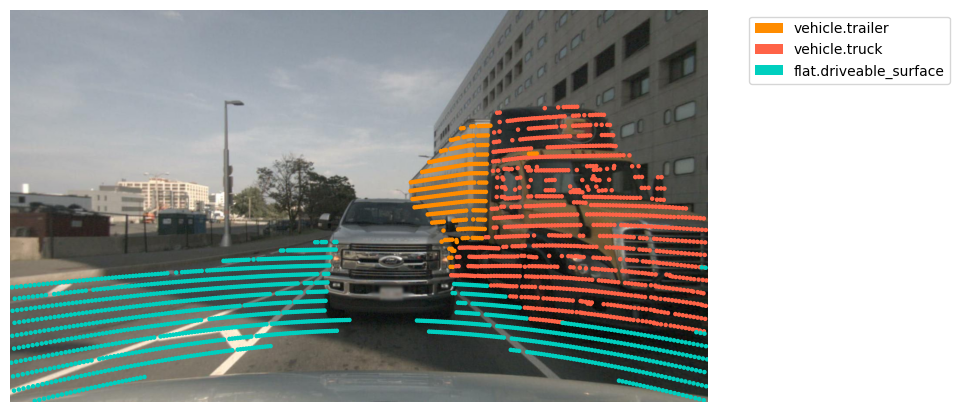

In [20]:
# nuscenes-lidarseg
nusc.render_pointcloud_in_image(my_sample['token'],
                                pointsensor_channel='LIDAR_TOP',
                                camera_channel='CAM_BACK',
                                render_intensity=False,
                                show_lidarseg=True,
                                filter_lidarseg_labels=[22, 23, 24],
                                show_lidarseg_legend=True)

## Render sample (i.e. lidar, radar and all cameras)
Of course, like in the original nuScenes devkit, you can render all the sensors at once with ```render_sample```. In this extended nuScenes devkit, you can set ```show_lidarseg=True``` to see the lidarseg labels. Similar to the above methods, you can use ```filter_lidarseg_labels``` to display only the classes you wish to see.

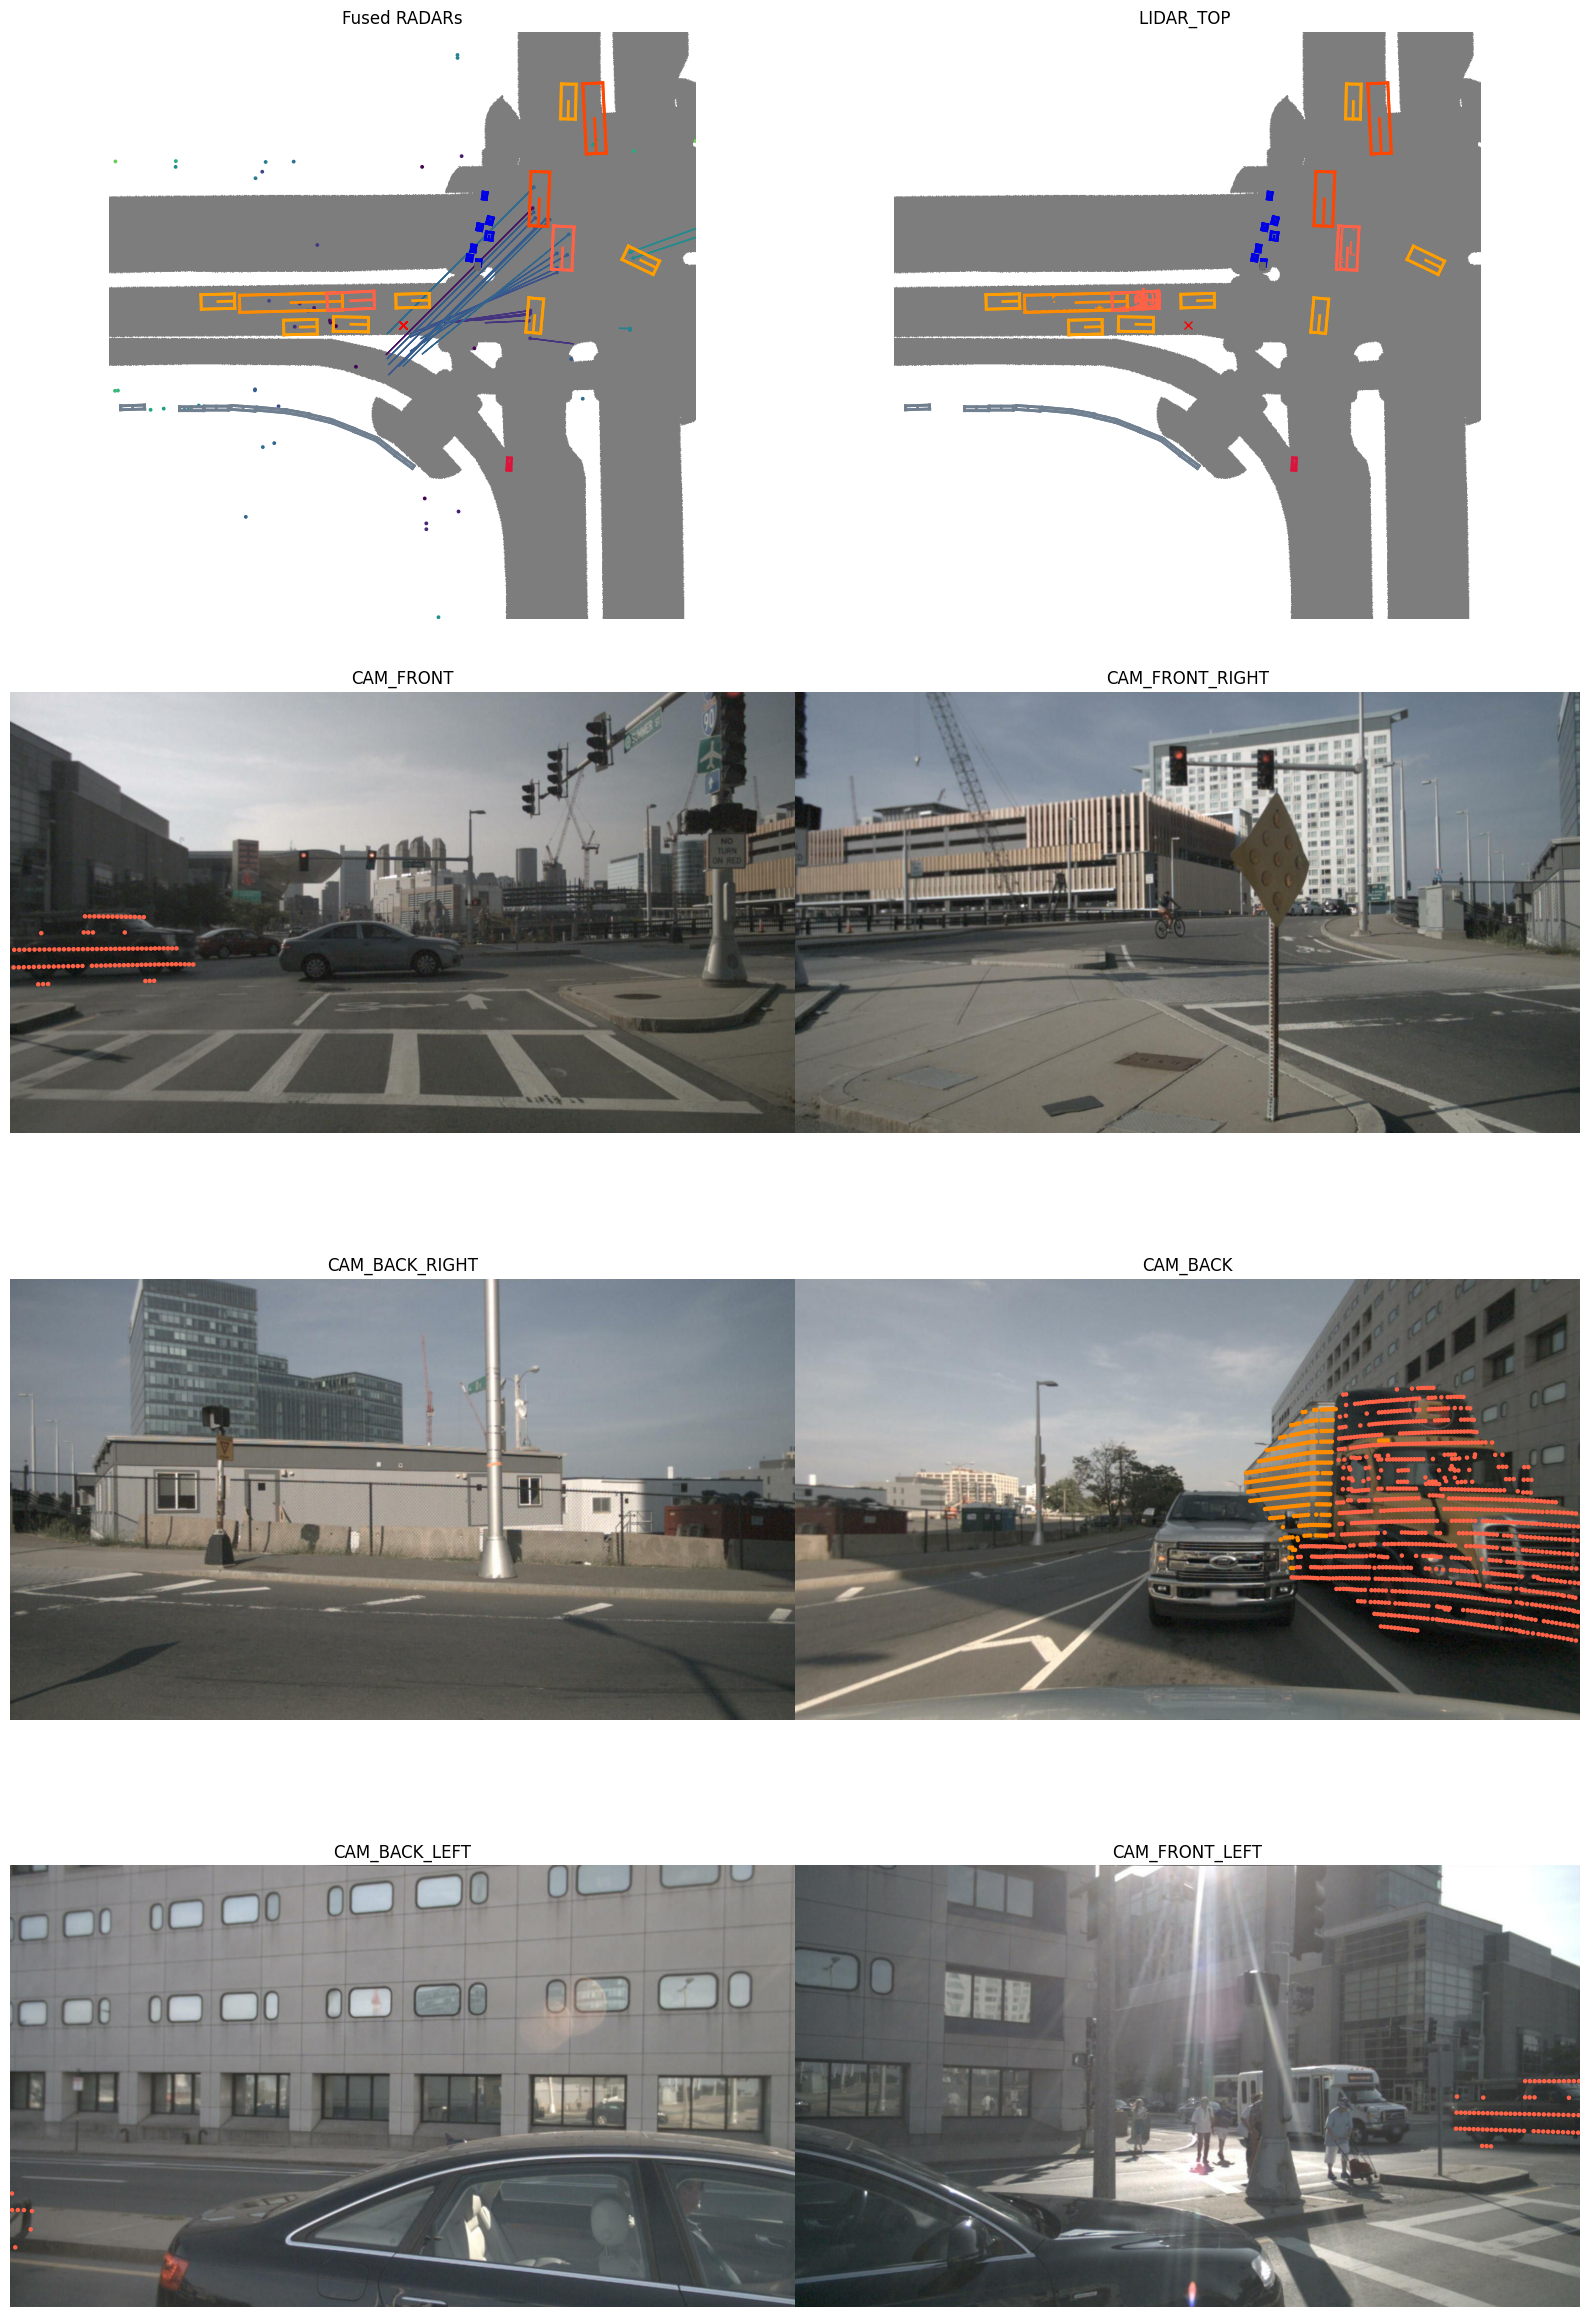

In [21]:
# nuscenes-lidarseg
nusc.render_sample(my_sample['token'],
                   show_lidarseg=True,
                   filter_lidarseg_labels=[22, 23])

## Visualizing LiDAR segmentation predictions
In all the above functions, the labels of the LiDAR pointcloud which have been rendered are the ground truth. If you have trained a model to segment LiDAR pointclouds and have run it on the nuScenes-lidarseg dataset, you can visualize your model's predictions with nuScenes-lidarseg as well!

Each of your .bin files should be a `numpy.uint8` array; as a tip, you can save your predictions as follows:
```
np.array(predictions).astype(np.uint8).tofile(bin_file_out)
```
- `predictions`: The predictions from your model (e.g. `[30, 5, 18, ..., 30]`)
- `bin_file_out`: The path to write your .bin file to (e.g. `/some/folder/<lidar_sample_data_token>_lidarseg.bin`)

Then you simply need to pass the path to the .bin file where your predictions for the given sample are to `lidarseg_preds_bin_path` for these functions:
- `list_lidarseg_categories`
- `render_sample_data`
- `render_pointcloud_in_image`
- `render_sample`                 

For example, let's assume the predictions for `my_sample` is stored at `/data/sets/nuscenes/lidarseg/v1.0-mini` with the format `<lidar_sample_data_token>_lidarseg.bin`:

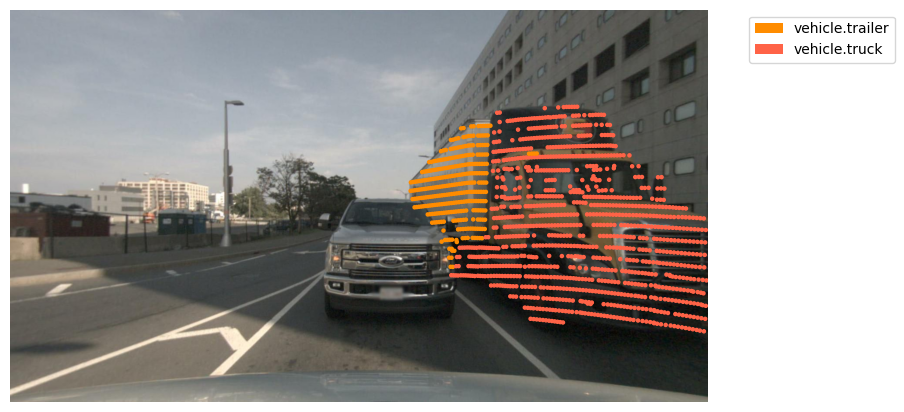

In [24]:
import os

my_sample = nusc.sample[87]
sample_data_token = my_sample['data']['LIDAR_TOP']
my_predictions_bin_file = os.path.join('./nuscenes/lidarseg/v1.0-mini', sample_data_token + '_lidarseg.bin')

nusc.render_pointcloud_in_image(my_sample['token'],
                                pointsensor_channel='LIDAR_TOP',
                                camera_channel='CAM_BACK',
                                render_intensity=False,
                                show_lidarseg=True,
                                filter_lidarseg_labels=[22, 23],
                                show_lidarseg_legend=True,
                                lidarseg_preds_bin_path=my_predictions_bin_file)

For these functions that render an entire scene, you will need to pass the path to the folder which contains the .bin files for each sample in a scene to `lidarseg_preds_folder`:
- `render_scene_channel_lidarseg`
- `render_scene_lidarseg`

Pay special attention that **each set of predictions in the folder _must_ be a `.bin` file and named as `<lidar_sample_data_token>_lidarseg.bin`**.

(Note: the following code is commented out as it crashes in Jupyter notebooks.)

## Get the points to work with them
Each sample has a shape of (# of points in a scan, 4) the 4 values are x,y,z,classification
Note: x,y,z are not normalize

In [7]:
import os.path as osp
import os
import numpy as np
from nuscenes.nuscenes import NuScenes
from nuscenes.utils.data_classes import LidarPointCloud
from nuscenes.utils.data_io import load_bin_file, panoptic_to_lidarseg

dataroot='./nuscenes/'
# Load the nuScenes dataset (mini-split, in this case).
nusc = NuScenes(version='v1.0-mini', dataroot='./nuscenes', verbose=True)

Loading NuScenes tables for version v1.0-mini...
Loading nuScenes-lidarseg...
32 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
404 lidarseg,
Done loading in 0.495 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.


In [8]:
for i in range(404): # Max # of samples 403
    sample = nusc.sample[i]

    # Load some random sample token.
    sd_record = nusc.get('sample', sample['token'])
    ref_sd_token = sd_record['data']['LIDAR_TOP']
    ref_sd_record = nusc.get('sample_data', ref_sd_token)

    # Load pointcloud.
    pcl_path = osp.join(nusc.dataroot, ref_sd_record['filename'])
    pc = LidarPointCloud.from_file(pcl_path)
    points = pc.points.T
    points = points.astype(np.float32)
    print(points.shape)  # (34688, 4) <--- GET THE DATA :)

(34688, 4)
(34720, 4)
(34720, 4)
(34688, 4)
(34752, 4)
(34784, 4)
(34720, 4)
(34720, 4)
(34688, 4)
(34688, 4)
(34688, 4)
(34720, 4)
(34688, 4)
(34752, 4)
(34752, 4)
(34784, 4)
(34784, 4)
(34752, 4)
(34688, 4)
(34688, 4)
(34688, 4)
(34720, 4)
(34688, 4)
(34720, 4)
(34752, 4)
(34720, 4)
(34720, 4)
(34720, 4)
(34752, 4)
(34720, 4)
(34720, 4)
(34720, 4)
(34720, 4)
(34752, 4)
(34720, 4)
(34688, 4)
(34688, 4)
(34720, 4)
(34720, 4)
(34752, 4)
(34688, 4)
(34752, 4)
(34720, 4)
(34784, 4)
(34720, 4)
(34688, 4)
(34688, 4)
(34720, 4)
(34720, 4)
(34720, 4)
(34688, 4)
(34688, 4)
(34688, 4)
(34720, 4)
(34688, 4)
(34720, 4)
(34720, 4)
(34784, 4)
(34784, 4)
(34752, 4)
(34752, 4)
(34752, 4)
(34720, 4)
(34688, 4)
(34688, 4)
(34688, 4)
(34752, 4)
(34720, 4)
(34720, 4)
(34688, 4)
(34688, 4)
(34752, 4)
(34784, 4)
(34688, 4)
(34720, 4)
(34752, 4)
(34720, 4)
(34752, 4)
(34720, 4)
(34400, 4)
(34688, 4)
(34720, 4)
(34720, 4)
(34688, 4)
(34688, 4)
(34720, 4)
(34688, 4)
(34752, 4)
(34752, 4)
(34752, 4)
(34720, 4)

In [9]:
points

array([[-3.1290541e+00,  9.7861206e-03, -1.8557305e+00,  3.0000000e+00],
       [-3.3128881e+00,  1.1567636e-02, -1.8613985e+00,  2.0000000e+00],
       [-3.5211694e+00,  1.2952420e-02, -1.8722599e+00,  2.0000000e+00],
       ...,
       [-1.2919028e+01,  1.3504063e-02,  1.8156506e+00,  1.0000000e+01],
       [-1.3498990e+01,  1.8842468e-02,  2.2178080e+00,  3.3000000e+01],
       [-1.3333394e+01,  2.0943131e-02,  2.5121439e+00,  2.8000000e+01]],
      dtype=float32)

## Conclusion
And this brings us to the end of the tutorial for nuScenes-lidarseg and Panoptic nuScenes, enjoy!